# Predicting The Premier League

- In this project I will be using data from 2014-19 of the epl which will have data of every match played in the premeier league during this period. I have collected the data from https://sports-statistics.com/sports-data/ .

In [ ]:
#importing the basic libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# !pip install --upgrade pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import requests
from datetime import date
from bs4 import BeautifulSoup
# from google.colab import drive
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime
from joblib import dump, load 
from pathlib import Path
from sklearn.metrics import mean_squared_error
import time
import urllib
import csv
import datetime
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
# drive.mount('/content/drive')

import warnings
warnings.simplefilter("ignore")


dataset_file_name = "dataset.csv"
models_dir_path = "./models/"
predect_dir_path = "./predict/"

###  Importing the data files and cleaning it as per need
- I am going to use 5 csv files each conatining all the matches of a single season, so we have concatinated all 5 files in a single dataframe for easier data manipulation 

In [ ]:
#!pip install penaltyblog
import penaltyblog as pb
league_list = ["ENG Premier League","DEU Bundesliga 1","DEU Bundesliga 2","ENG Championship","ENG League 1"
               ,"ENG League 2","ENG Conference","ESP La Liga","ESP La Liga Segunda","TUR Super Lig","FRA Ligue 1"
               ,"FRA Ligue 2","GRC Super League","ITA Serie A","ITA Serie B","NLD Eredivisie","PRT Liga 1",
               "SCO Premier League","SCO Division 1","SCO Division 2","SCO Division 3"]

start_season = 2019
end_season = 2023

dataframes = []
for league in league_list:
    for year in range(start_season,end_season):
        try:
            df = pb.scrapers.FootballData(league, f"{year}-{year+1}").get_fixtures()
            dataframes.append(df)
        except:
            print(f"not able to load for year :{year}-{year+1} for div : {league}")
df_all = pd.concat(dataframes)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_epl = df_all
df_epl.describe()

,fthg,ftag,hthg,htag,hs,as,hst,ast,hf,af,...,b365_cahh,b365_caha,pcahh,pcaha,max_cahh,max_caha,avg_cahh,avg_caha,goals_home,goals_away
count,2819.000000,2819.000000,2819.000000,2819.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,...,2816.000000,2816.000000,2818.000000,2818.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000
mean,1.474991,1.174175,0.683221,0.520397,13.157209,10.958206,4.605828,3.756518,11.858129,11.986963,...,1.928299,1.935227,1.949258,1.952686,1.993884,1.998251,1.916151,1.916176,1.474991,1.174175
std,1.279165,1.142986,0.820712,0.737704,5.146773,4.725306,2.470601,2.286062,3.922314,3.922120,...,0.099526,0.099062,0.100012,0.100146,0.098066,0.101239,0.089696,0.089581,1.279165,1.142986
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.630000,1.680000,1.650000,1.720000,1.790000,1.780000,1.690000,1.730000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,9.000000,9.000000,...,1.850000,1.850000,1.880000,1.880000,1.910000,1.920000,1.840000,1.840000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,4.000000,3.000000,12.000000,12.000000,...,1.930000,1.940000,1.940000,1.950000,1.990000,2.000000,1.910000,1.910000,1.000000,1.000000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,14.000000,6.000000,5.000000,14.000000,15.000000,...,2.000000,2.010000,2.030000,2.030000,2.070000,2.070000,1.990000,1.980000,2.000000,2.000000
max,9.000000,9.000000,5.000000,5.000000,36.000000,35.000000,20.000000,16.000000,26.000000,28.000000,...,2.200000,2.250000,2.230000,2.330000,2.360000,2.400000,2.150000,2.200000,9.000000,9.000000


- We have to sort the dataframe with respect to the dates of the matches played

In [ ]:
from datetime import datetime
df_epl = df_all.loc[:, ~df_all.columns.str.contains('^Unnamed')]
df_epl = df_epl[df_epl.date.notna()]
df_epl['date'] = pd.to_datetime(df_epl['date'], infer_datetime_format=True)
df_epl['date'] = pd.to_datetime(df_epl['date'],format = '%d-%m-%Y')
  
df_epl.sort_values(by = 'date',inplace = True) #sorting the dataset by date
df_epl.reset_index(drop=True,inplace = True)
df_epl.drop(['div','time', 'b365_h','b365_d','b365_a'],axis = 1,inplace = True) #dropping the div column as it is understood it is div1 and also the betting values

df_epl.rename(columns={'team_home': 'hometeam',
                   'team_away': 'awayteam',
                   'date': 'Date',
                   'fthg': 'fulltime_home_goals',
                   'ftag': 'fulltime_away_goals',
                   'ftr': 'fulltime_results',
                   'htr': 'halftime_results',
                   'hthg': 'halftime_home_goals',
                   'htag': 'halftime_away_goals',
                   'hc': 'home_corner',
                   'ac': 'away_corner',
                   'hs': 'home_shot',
                   'as': 'away_shot',
                   'hst': 'home_shot_ontarget',
                   'ast': 'away_shot_ontarget',
                   'hy': 'home_yellow',
                   'ay': 'away_yellow',
                   'hr': 'home_red',
                   'ar': 'away_red',
                   'hf': 'home_fouls',
                   'af': 'away_fouls',
                   },
          inplace=True, errors='raise')
#df_epl = df_epl.iloc[:,:22]
df_epl = df_epl[df_epl.hometeam.notna()]
df_epl = df_epl[df_epl.awayteam.notna()]
df_epl = df_epl[df_epl.fulltime_results.notna()]
df_epl = df_epl[df_epl.halftime_results.notna()]

#df_epl = df_epl.apply(lambda x: x.fillna(x.mean()),axis=0)

df_epl.reset_index()
df_epl.head(20)

,Date,datetime,season,competition,hometeam,awayteam,fulltime_home_goals,fulltime_away_goals,fulltime_results,halftime_home_goals,...,b365_cahh,b365_caha,pcahh,pcaha,max_cahh,max_caha,avg_cahh,avg_caha,goals_home,goals_away
0,2022-07-15,2022-07-15 19:30:00,2022-2023,DEU Bundesliga 2,Kaiserslautern,Hannover,2,1,H,1,...,1.75,2.13,1.77,2.11,1.83,2.16,1.79,2.06,2,1
1,2022-07-16,2022-07-16 12:00:00,2022-2023,DEU Bundesliga 2,Regensburg,Darmstadt,2,0,H,1,...,2.02,1.83,2.05,1.81,2.10,1.86,2.05,1.79,2,0
2,2022-07-16,2022-07-16 12:00:00,2022-2023,DEU Bundesliga 2,Sandhausen,Bielefeld,2,1,H,1,...,1.90,1.95,1.87,1.98,2.08,1.98,1.98,1.86,2,1
3,2022-07-16,2022-07-16 12:00:00,2022-2023,DEU Bundesliga 2,St Pauli,Nurnberg,3,2,H,3,...,1.95,1.90,1.91,1.94,1.99,2.12,1.87,1.98,3,2
4,2022-07-16,2022-07-16 12:00:00,2022-2023,DEU Bundesliga 2,Greuther Furth,Holstein Kiel,2,2,D,0,...,1.85,2.00,1.86,1.99,1.94,2.07,1.87,1.97,2,2
5,2022-07-16,2022-07-16 19:30:00,2022-2023,DEU Bundesliga 2,Magdeburg,Fortuna Dusseldorf,1,2,A,0,...,2.00,1.85,1.99,1.86,2.10,1.90,2.03,1.82,1,2
6,2022-07-17,2022-07-17 12:30:00,2022-2023,DEU Bundesliga 2,Hansa Rostock,Heidenheim,0,1,A,0,...,2.02,1.83,2.15,1.73,2.15,1.88,2.06,1.79,0,1
7,2022-07-17,2022-07-17 12:30:00,2022-2023,DEU Bundesliga 2,Braunschweig,Hamburg,0,2,A,0,...,1.95,1.90,1.93,1.92,1.97,1.98,1.91,1.93,0,2
8,2022-07-17,2022-07-17 12:30:00,2022-2023,DEU Bundesliga 2,Paderborn,Karlsruhe,5,0,H,0,...,1.90,1.95,1.91,1.94,1.99,2.01,1.92,1.91,5,0
9,2022-07-22,2022-07-22 17:30:00,2022-2023,DEU Bundesliga 2,Fortuna Dusseldorf,Paderborn,2,1,H,2,...,1.95,1.90,2.00,1.91,2.04,2.02,1.95,1.89,2,1


In [ ]:
def func(df):
    df = df.copy()
    for col in df:
        # select only integer or float dtypes
        if df[col].dtype in ("int", "float"):
            mean_value=df[col].mean()
            df[col] = df[col].fillna(mean_value)
    return df

df_epl = func(df_epl)

- As there is no column which mentions the season in which the match is played, we have to specify the season for each match

In [ ]:
#assigning the season to each game
#df_epl.columns = ['Date','hometeam','awayteam','fulltime_home_goals','fulltime_away_goals','fulltime_results','halftime_home_goals','halftime_away_goals','halftime_results','refree','home_shot','away_shot','home_shot_ontarget','away_shot_ontarget','home_fouls','away_fouls','home_corner','away_corner','home_yellow','away_yellow','home_red','away_red']
df_epl = df_epl[['Date','hometeam','awayteam','fulltime_home_goals','fulltime_away_goals','fulltime_results','halftime_home_goals','halftime_away_goals','halftime_results','referee','home_shot','away_shot','home_shot_ontarget','away_shot_ontarget','home_fouls','away_fouls','home_corner','away_corner','home_yellow','away_yellow','home_red','away_red']]
df_epl['season'] = (df_epl.index // 380) + 1
df_epl.head()

,Date,hometeam,awayteam,fulltime_home_goals,fulltime_away_goals,fulltime_results,halftime_home_goals,halftime_away_goals,halftime_results,referee,...,away_shot_ontarget,home_fouls,away_fouls,home_corner,away_corner,home_yellow,away_yellow,home_red,away_red,season
0,2022-07-15,Kaiserslautern,Hannover,2,1,H,1,0,H,NaN,...,5.0,15.0,16.0,4.0,3.0,6,3,0,0,1
1,2022-07-16,Regensburg,Darmstadt,2,0,H,1,0,H,NaN,...,2.0,17.0,12.0,3.0,5.0,3,4,0,1,1
2,2022-07-16,Sandhausen,Bielefeld,2,1,H,1,0,H,NaN,...,6.0,21.0,15.0,5.0,6.0,7,3,0,1,1
3,2022-07-16,St Pauli,Nurnberg,3,2,H,3,0,H,NaN,...,4.0,17.0,10.0,4.0,4.0,3,4,0,0,1
4,2022-07-16,Greuther Furth,Holstein Kiel,2,2,D,0,1,A,NaN,...,2.0,14.0,9.0,12.0,1.0,5,2,0,0,1


In [ ]:
print('Total teams played in these 5 years: ',df_epl['awayteam'].nunique())
print('\nNames of those teams are:',df_epl['awayteam'].unique())

Total teams played in these 5 years:  385

Names of those teams are: ['Hannover' 'Darmstadt' 'Bielefeld' 'Nurnberg' 'Holstein Kiel'
 'Fortuna Dusseldorf' 'Heidenheim' 'Hamburg' 'Karlsruhe' 'Paderborn'
 'Sandhausen' 'Braunschweig' 'Kaiserslautern' 'Greuther Furth' 'St Pauli'
 'Regensburg' 'Magdeburg' 'Hansa Rostock' 'Burnley' 'Niort' 'Hibernian'
 'Rangers' 'Dundee United' 'Ross County' 'Rodez' 'Caen' 'Arbroath'
 'Raith Rvs' 'Partick' 'Laval' 'Clyde' 'FC Edinburgh' 'Montrose' 'Alloa'
 'Morton' 'Queens Park' 'Amiens' 'Grenoble' 'Pau FC' 'St Etienne'
 'Valenciennes' 'Airdrie Utd' 'Forest Green' 'Charlton' 'Stevenage'
 'Barrow' 'Peterboro' 'Mansfield' 'Crewe' 'Colchester' 'Grimsby' 'Swindon'
 'Newport County' 'Crawley Town' 'Gillingham' 'Burton' 'Portsmouth'
 'Fleetwood Town' 'Barnsley' 'Shrewsbury' 'Exeter' 'Doncaster' 'Oxford'
 'Bolton' 'Milton Keynes Dons' 'Forfar' 'Stirling' 'East Fife'
 'Albion Rvs' 'Annan Athletic' 'QPR' 'Hartlepool' 'Norwich' 'Reading'
 'Birmingham' 'West Brom' 'Stok

In [ ]:
#counting total matches played by each team
number_of_games_epl = df_epl['hometeam'].value_counts() + df_epl['awayteam'].value_counts()
team_games_epl = pd.DataFrame(number_of_games_epl).sort_index(axis = 0) 
team_games_epl.columns = ['Total games']
team_games_epl

,Total games
AEK,12
AFC Wimbledon,17
AZ Alkmaar,13
Aberdeen,14
Accrington,17
...,...
Wrexham,18
Wycombe,17
Yeovil,18
York,18


In [ ]:
# team_games_epl.plot(kind='bar',color='blue', legend=False, figsize=(20,10))
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.xlabel('Teams',fontsize=20)
# plt.ylabel('Total games',fontsize=20)
# plt.title('Total games per team',fontsize=20, color='red')
# plt.show()

### Results for home and away matches

- We have to see what percentage of matches have ended in a draw and how much is the home advantage in the epl

In [ ]:
# results = pd.DataFrame(df_epl['fulltime_results'].value_counts())
# fig = plt.figure(figsize = (8,8))
# plt.pie(results,autopct = '%1.1f%%',startangle = 100,labels = ['Home wins','Away wins','Draws'],shadow = True,explode = (0.05,0.05,0.05),colors = ('green','orange','grey'),textprops = {'fontsize':15})
# plt.show()

### Points Table with some stats

- We will create a ponts table for the last 5 seasons and see which teams have performed better and worst, we will also which stats has helped the to do so or has troubled them.

In [ ]:
homewins = (df_epl[df_epl['fulltime_results'] == 'H'].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
homewins.index.names = ['Team']
homewins.columns = ['home_wins']

homeloss = (df_epl[df_epl['fulltime_results'] == 'A'].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
homeloss.index.names = ['Team']
homeloss.columns = ['home_loss']

awaywins = (df_epl[df_epl['fulltime_results'] == 'A'].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
awaywins.index.names = ['Team']
awaywins.columns = ['away_wins']

awayloss = (df_epl[df_epl['fulltime_results'] == 'H'].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
awayloss.index.names = ['Team']
awayloss.columns = ['away_loss']

homedraws = (df_epl[df_epl['fulltime_results'] == 'D'].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
homedraws.index.names = ['Team']
homedraws.columns = ['hdraws']

awaydraws = (df_epl[df_epl['fulltime_results'] == 'D'].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
awaydraws.index.names = ['Team']
awaydraws.columns = ['adraws']

total_draws = pd.DataFrame(homedraws['hdraws'] + awaydraws['adraws'])
total_draws.columns = ['Draws']

homegoals = (df_epl[df_epl['fulltime_home_goals'] >= 0].groupby([df_epl.hometeam]).agg('sum'))[['fulltime_home_goals']]
homegoals.index.names = ['Team']
homegoals.columns = ['home_goals_scored']

homegoals2 = (df_epl[df_epl['fulltime_away_goals'] >= 0].groupby([df_epl.hometeam]).agg('sum'))[['fulltime_away_goals']]
homegoals2.index.names = ['Team']
homegoals2.columns = ['home_goals_conceded']

awaygoals = (df_epl[df_epl['fulltime_away_goals'] >= 0].groupby([df_epl.awayteam]).agg('sum'))[['fulltime_away_goals']]
awaygoals.index.names = ['Team']
awaygoals.columns = ['away_goals_scored']

awaygoals2 = (df_epl[df_epl['fulltime_home_goals'] >= 0].groupby([df_epl.awayteam]).agg('sum'))[['fulltime_home_goals']]
awaygoals2.index.names = ['Team']
awaygoals2.columns = ['away_goals_conceded']

shotstaken1 = (df_epl[df_epl['home_shot'] >= 0].groupby([df_epl.hometeam]).agg('sum'))[['home_shot']]
shotstaken1.index.names = ['Team']
shotstaken1.columns = ['shots_taken']

shotstaken2 = (df_epl[df_epl['home_shot'] >= 0].groupby([df_epl.awayteam]).agg('sum'))[['away_shot']]
shotstaken2.index.names = ['Team']
shotstaken2.columns = ['shots_taken']

shotontarget1 = (df_epl[df_epl['home_shot_ontarget'] >= 0].groupby([df_epl.hometeam]).agg('sum'))[['home_shot_ontarget']]
shotontarget1.index.names = ['Team']
shotontarget1.columns = ['shots_on_target']

shotontarget2 = (df_epl[df_epl['home_shot_ontarget'] >= 0].groupby([df_epl.awayteam]).agg('sum'))[['away_shot_ontarget']]
shotontarget2.index.names = ['Team']
shotontarget2.columns = ['shots_on_target']

fouls1 = (df_epl[df_epl['home_fouls'] >= 0].groupby([df_epl.hometeam]).agg(sum))[['home_fouls']]
fouls1.index.names =['Team']
fouls1.columns = ['fouls']


fouls2 = (df_epl[df_epl['home_fouls'] >= 0].groupby([df_epl.awayteam]).agg(sum))[['away_fouls']]
fouls2.index.names =['Team']
fouls2.columns = ['fouls']

yellow_cards1 = (df_epl[df_epl['home_yellow'] >=0].groupby([df_epl.hometeam]).agg(sum))[['home_yellow']]
yellow_cards1.index.names = ['Team']
yellow_cards1.columns = ['yellow_cards']

yellow_cards2 = (df_epl[df_epl['home_yellow'] >=0].groupby([df_epl.awayteam]).agg(sum))[['away_yellow']]
yellow_cards2.index.names = ['Team']
yellow_cards2.columns = ['yellow_cards']

red_cards1 = (df_epl[df_epl['home_red'] >=0].groupby([df_epl.hometeam]).agg(sum))[['home_red']]
red_cards1.index.names = ['Team']
red_cards1.columns = ['red_cards']

red_cards2 = (df_epl[df_epl['home_red'] >=0].groupby([df_epl.awayteam]).agg(sum))[['away_red']]
red_cards2.index.names = ['Team']
red_cards2.columns = ['red_cards']

corner_taken1 = (df_epl[df_epl['home_corner'] >= 0].groupby([df_epl.hometeam]).agg(sum))[['home_corner']]
corner_taken1.index.names = ['Team']
corner_taken1.columns = ['corners']

corner_taken2 = (df_epl[df_epl['home_corner'] >= 0].groupby([df_epl.awayteam]).agg(sum))[['away_corner']]
corner_taken2.index.names = ['Team']
corner_taken2.columns = ['corners']

comebacks1 = (df_epl[(df_epl['halftime_results'] == 'A') & (df_epl['fulltime_results'] == 'H')].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
comebacks1.index.names = ['Team']
comebacks1.columns = ['comebacks'] 

comebacks2 = (df_epl[(df_epl['halftime_results'] == 'H') & (df_epl['fulltime_results'] == 'A')].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
comebacks2.index.names = ['Team']
comebacks2.columns = ['comebacks'] 

bigwins1 = (df_epl[(df_epl['fulltime_home_goals'] - df_epl['fulltime_away_goals']) >= 3].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
bigwins1.index.names = ['Team']
bigwins1.columns = ['big_wins']

bigwins2 = (df_epl[(df_epl['fulltime_away_goals'] - df_epl['fulltime_home_goals']) >= 3].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
bigwins2.index.names = ['Team']
bigwins2.columns = ['big_wins']

bigloss1 = (df_epl[(df_epl['fulltime_home_goals'] - df_epl['fulltime_away_goals']) >= 3].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
bigloss1.index.names = ['Team']
bigloss1.columns = ['big_loss']

bigloss2 = (df_epl[(df_epl['fulltime_away_goals'] - df_epl['fulltime_home_goals']) >= 3].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
bigloss2.index.names = ['Team']
bigloss2.columns = ['big_loss']

cs1 = (df_epl[df_epl['fulltime_away_goals'] == 0].groupby([df_epl.hometeam]).agg('count'))[['fulltime_results']]
cs1.index.names = ['Team']
cs1.columns = ['cs']

cs2 = (df_epl[df_epl['fulltime_home_goals'] == 0].groupby([df_epl.awayteam]).agg('count'))[['fulltime_results']]
cs2.index.names = ['Team']
cs2.columns = ['cs']

points_table_epl = pd.concat([team_games_epl,homewins,homeloss,awaywins,awayloss,total_draws,homegoals,awaygoals,homegoals2,awaygoals2],axis = 1)
points_table_epl['clean sheets'] = cs1['cs'] + cs2['cs']
points_table_epl['goal_difference'] = points_table_epl['home_goals_scored'] + points_table_epl['away_goals_scored'] - points_table_epl['away_goals_conceded'] - points_table_epl['home_goals_conceded']
points_table_epl['goals_scored_per_match'] = (points_table_epl['home_goals_scored'] + points_table_epl['away_goals_scored'])/ points_table_epl['Total games']
points_table_epl['goals_scored_per_match'] = points_table_epl['goals_scored_per_match'].apply(lambda x: round(x,2))
points_table_epl['goals_conceded_per_match'] = (points_table_epl['home_goals_conceded'] + points_table_epl['away_goals_conceded'])/points_table_epl['Total games']
points_table_epl['goals_conceded_per_match'] = points_table_epl['goals_conceded_per_match'].apply(lambda x: round(x,2))
points_table_epl['shot_taken_per_match'] = (shotstaken1['shots_taken'] + shotstaken2['shots_taken'])/points_table_epl['Total games']
points_table_epl['shot_taken_per_match'] = points_table_epl['shot_taken_per_match'].apply(lambda x: round(x,2))
points_table_epl['shot_on_target_per_match'] = (shotontarget1['shots_on_target'] + shotontarget2['shots_on_target'])/points_table_epl['Total games']
points_table_epl['shot_on_target_per_match'] = points_table_epl['shot_on_target_per_match'].apply(lambda x: round(x,2))
points_table_epl['fouls_per_match'] = (fouls1['fouls'] + fouls2['fouls'])/points_table_epl['Total games']
points_table_epl['fouls_per_match'] = points_table_epl['fouls_per_match'].apply(lambda x: round(x,2))
points_table_epl['yellow_cards_per_match'] = (yellow_cards1['yellow_cards'] + yellow_cards2['yellow_cards'])/points_table_epl['Total games']
points_table_epl['yellow_cards_per_match'] = points_table_epl['yellow_cards_per_match'].apply(lambda x: round(x,2))
points_table_epl['red_cards_per_match'] = (red_cards1['red_cards'] + red_cards2['red_cards'])/points_table_epl['Total games']
points_table_epl['red_cards_per_match'] = points_table_epl['red_cards_per_match'].apply(lambda x: round(x,2))
points_table_epl['corners_per_match'] = (corner_taken1['corners'] + corner_taken2['corners'])/points_table_epl['Total games']
points_table_epl['corners_per_match'] = points_table_epl['corners_per_match'].apply(lambda x: round(x,2))
points_table_epl['Total_wins'] = points_table_epl['home_wins'] + points_table_epl['away_wins']
points_table_epl['home_points'] = points_table_epl['home_wins']*3 + homedraws['hdraws']
points_table_epl['away_points'] = points_table_epl['away_wins']*3 + awaydraws['adraws']
points_table_epl['comeback_wins'] = comebacks1['comebacks'] + comebacks2['comebacks']
points_table_epl['comeback_wins'].fillna(0,inplace = True)
points_table_epl['comeback_wins'] = points_table_epl['comeback_wins'].apply(lambda x: int(x))
points_table_epl['Big_wins'] = bigwins1['big_wins'] + bigwins2['big_wins']
points_table_epl['Big_wins'].fillna(0,inplace = True)
points_table_epl['Big_wins'] = points_table_epl['Big_wins'].apply(lambda x: int(x))
points_table_epl['Big_loss'] = bigloss1['big_loss'] + bigloss2['big_loss']
points_table_epl['Big_loss'].fillna(0,inplace = True)
points_table_epl['Big_loss'] = points_table_epl['Big_loss'].apply(lambda x: int(x))
points_table_epl['Total_points_won'] = points_table_epl['Total_wins']*3 + points_table_epl['Draws']
points_table_epl['points_per_match'] = points_table_epl['Total_points_won']/points_table_epl['Total games']
points_table_epl['points_per_match'] = points_table_epl['points_per_match'].apply(lambda x: round(x,2))
points_table_epl.sort_values(by = 'Total_points_won',ascending = False,inplace = True)
points_table_epl['team id'] = range(len(points_table_epl))#[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
points_table_epl

,Total games,home_wins,home_loss,away_wins,away_loss,Draws,home_goals_scored,away_goals_scored,home_goals_conceded,away_goals_conceded,...,corners_per_match,Total_wins,home_points,away_points,comeback_wins,Big_wins,Big_loss,Total_points_won,points_per_match,team id
Notts County,18,7.0,NaN,5.0,1.0,5.0,20,27,4,13,...,4.93,12.0,23.0,18.0,0,6,0,41.0,2.28,0
Leyton Orient,17,7.0,1.0,5.0,1.0,3.0,14,12,4,7,...,4.94,12.0,22.0,17.0,0,0,0,39.0,2.29,1
Napoli,14,6.0,NaN,6.0,NaN,2.0,18,16,4,6,...,5.93,12.0,19.0,19.0,0,4,0,38.0,2.71,2
Paris SG,14,5.0,NaN,7.0,NaN,2.0,14,24,7,2,...,6.36,12.0,16.0,22.0,0,6,0,38.0,2.71,3
Burnley,20,6.0,NaN,4.0,2.0,8.0,20,17,10,13,...,6.00,10.0,22.0,16.0,0,2,0,38.0,1.90,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Verona,14,1.0,6.0,NaN,5.0,NaN,7,4,15,12,...,5.50,NaN,NaN,NaN,0,0,0,NaN,NaN,380
Volendam,13,1.0,5.0,NaN,4.0,NaN,7,6,16,19,...,5.69,NaN,NaN,NaN,0,0,3,NaN,NaN,381
Wolves,14,2.0,3.0,NaN,5.0,4.0,5,3,11,11,...,4.86,NaN,8.0,NaN,0,0,3,NaN,NaN,382
Wrexham,18,9.0,NaN,4.0,2.0,NaN,35,15,9,9,...,4.93,13.0,NaN,15.0,3,5,0,NaN,NaN,383


### Important stats comparisions

- We will visualize the important stats of the league and see how it effects the performances of the teams

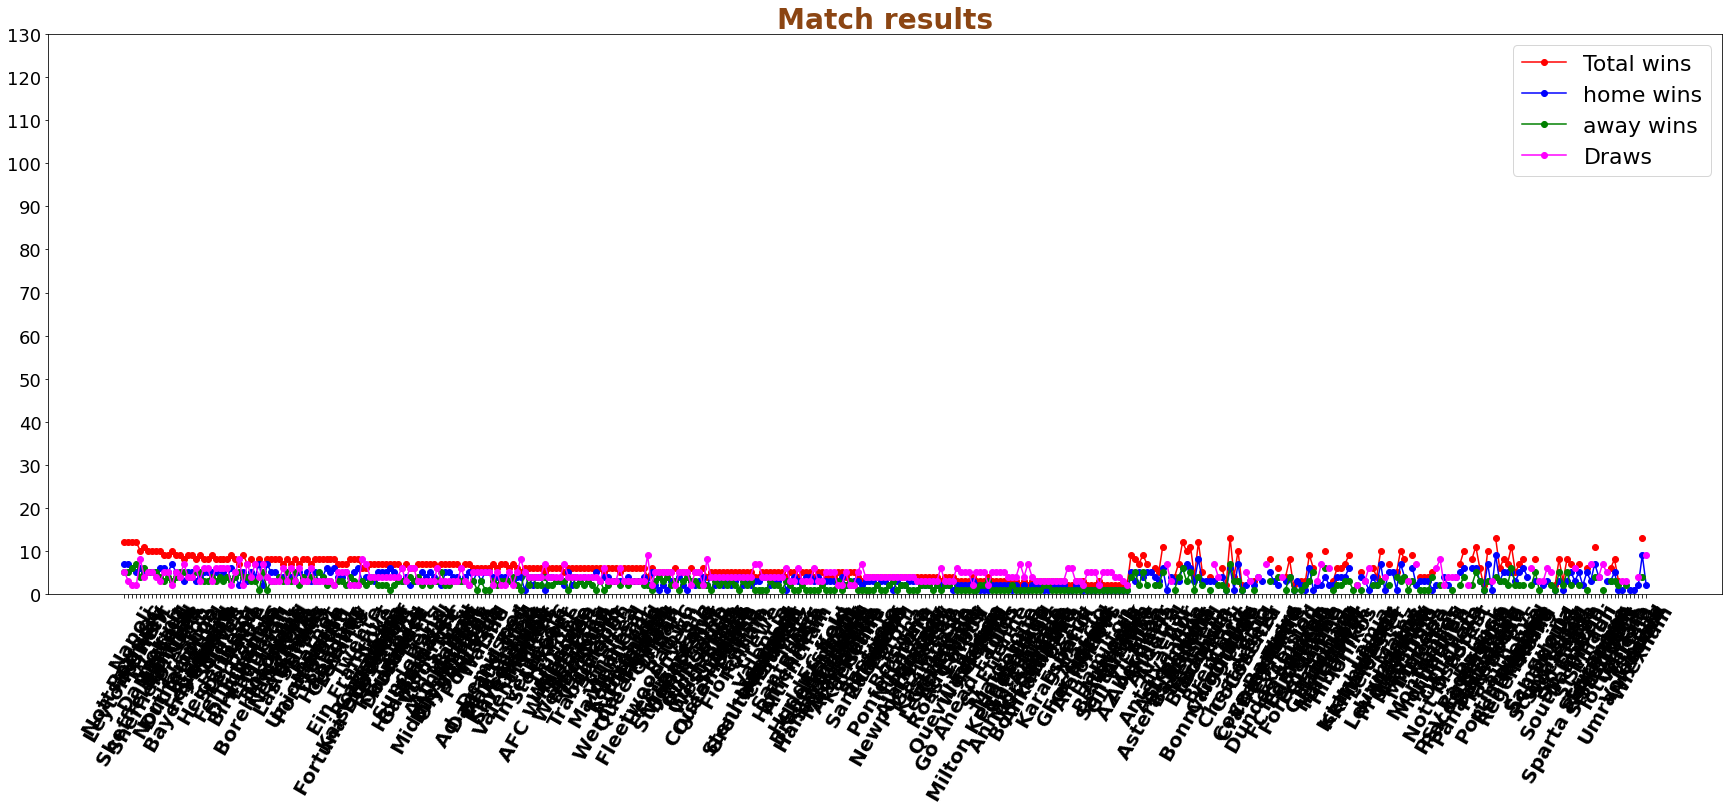

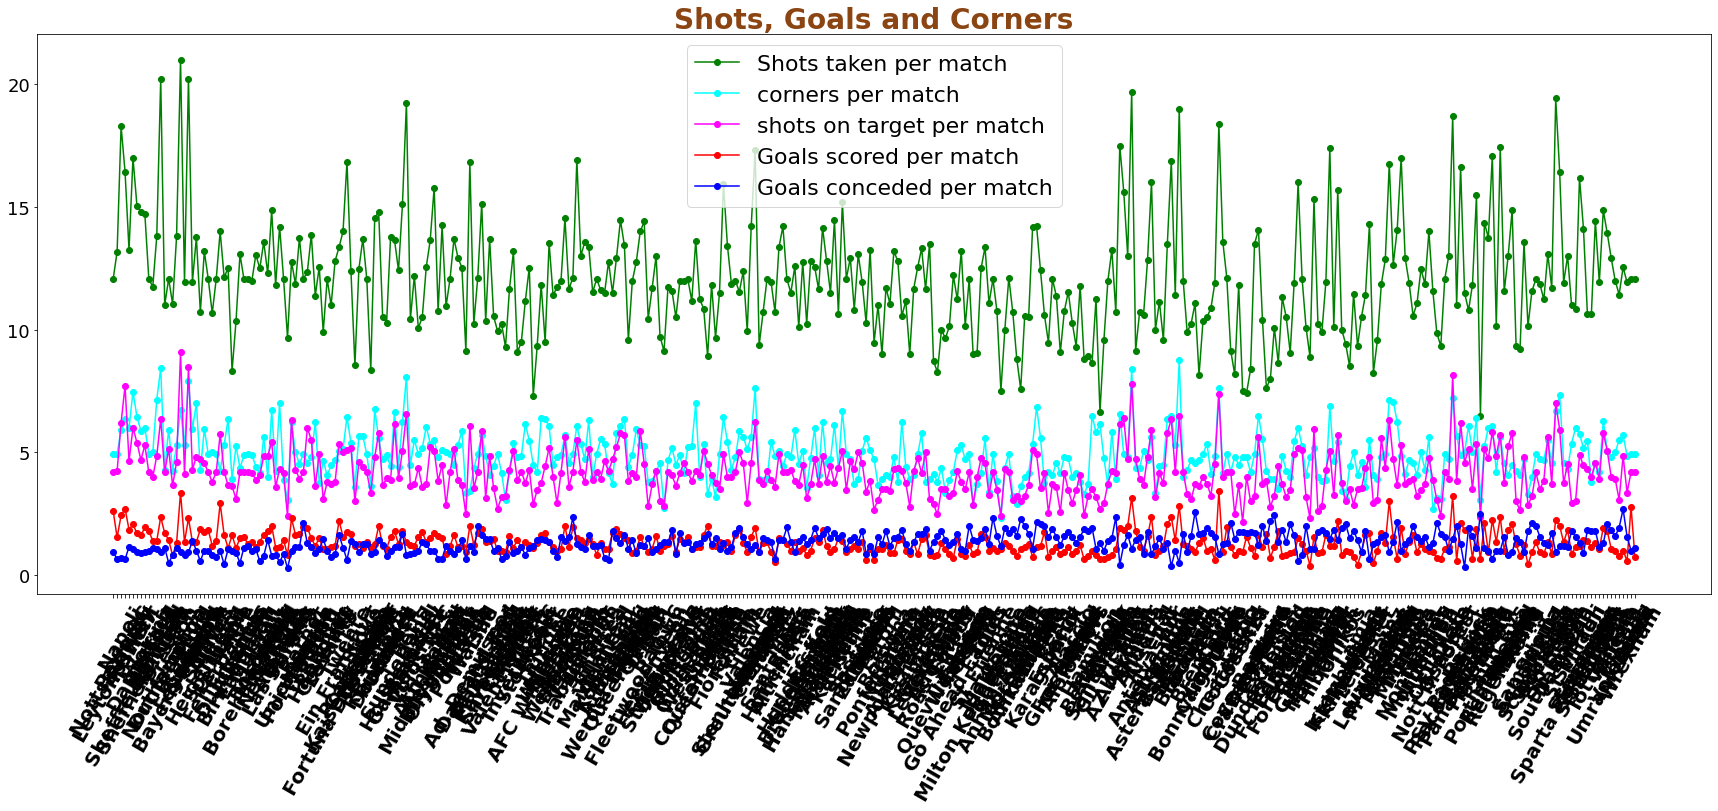

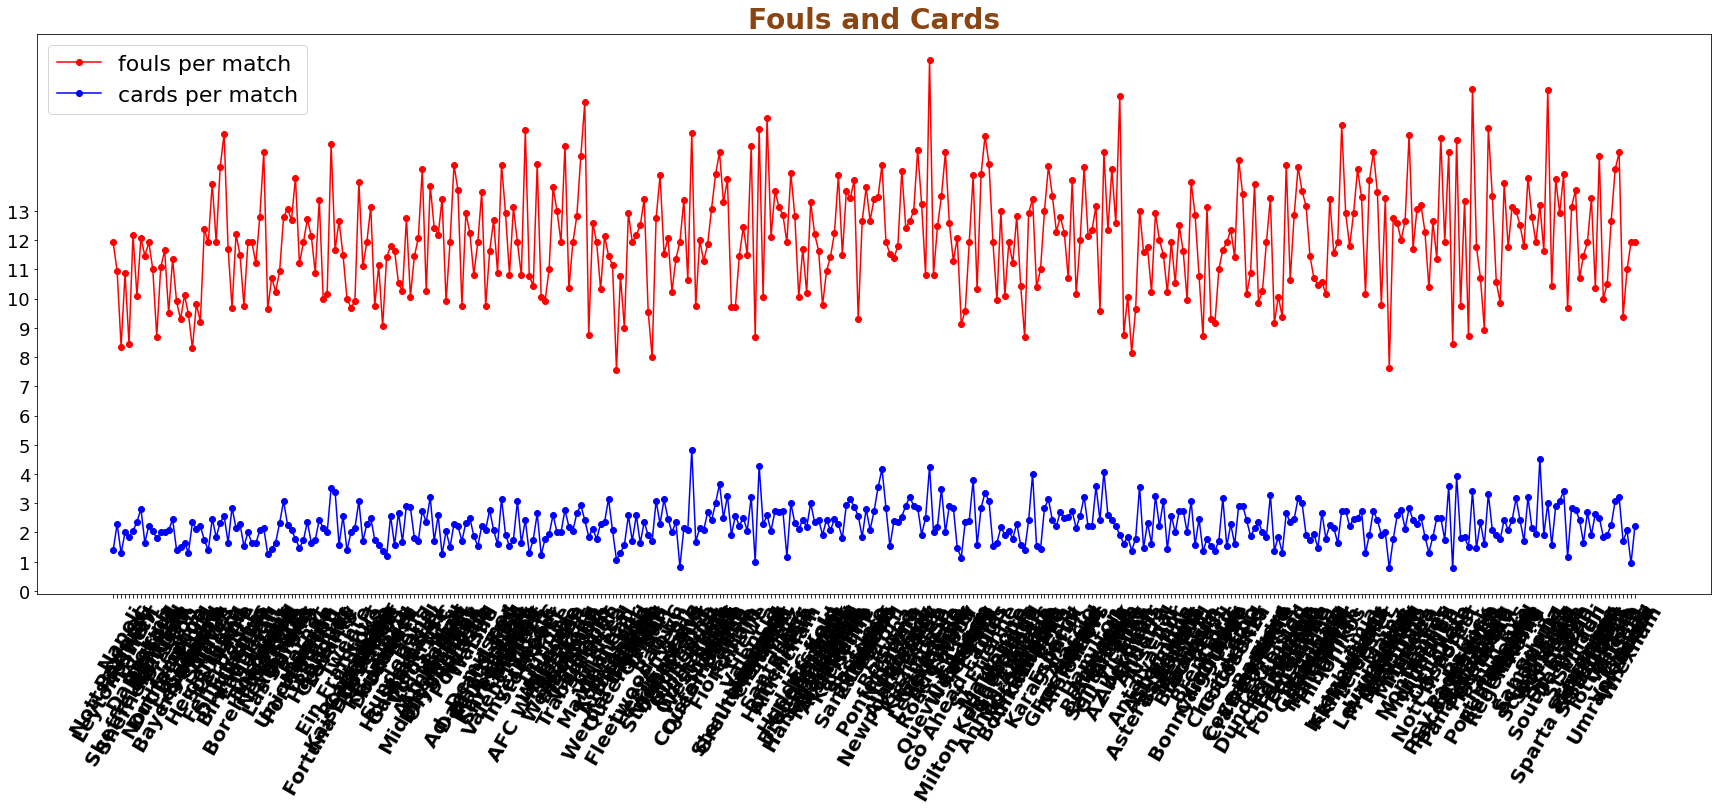

In [ ]:
plt.figure(figsize = (30,35))
plt.subplot(311)
plt.plot(points_table_epl.index,points_table_epl['Total_wins'],marker = 'o',color = 'red',label = 'Total wins')
plt.plot(points_table_epl.index,points_table_epl['home_wins'],marker = 'o',color = 'blue',label = 'home wins')
plt.plot(points_table_epl.index,points_table_epl['away_wins'],marker = 'o',color = 'green',label = 'away wins')
plt.plot(points_table_epl.index,points_table_epl['Draws'],marker = 'o',color = 'magenta',label = 'Draws')
plt.xticks(points_table_epl.index,rotation = 60,fontsize = 20,fontweight = 'bold')
plt.yticks(range(0,140,10),fontsize = 18)
plt.title('Match results',fontsize = 28,fontweight = 'bold',color = 'saddlebrown')
plt.legend(fontsize = 22)

plt.figure(figsize = (30,35))
plt.subplot(312)
plt.plot(points_table_epl.index,points_table_epl['shot_taken_per_match'],marker = 'o',color = 'green',label = 'Shots taken per match')
plt.plot(points_table_epl.index,points_table_epl['corners_per_match'],marker = 'o',color = 'cyan',label = 'corners per match')
plt.plot(points_table_epl.index,points_table_epl['shot_on_target_per_match'],marker = 'o',color = 'magenta',label = 'shots on target per match')
plt.plot(points_table_epl.index,points_table_epl['goals_scored_per_match'],marker = 'o',color = 'red',label = 'Goals scored per match')
plt.plot(points_table_epl.index,points_table_epl['goals_conceded_per_match'],marker = 'o',color =  'blue',label = 'Goals conceded per match')
plt.xticks(points_table_epl.index,rotation = 60,fontsize = 20,fontweight = 'bold')
plt.yticks(fontsize = 18)
plt.title('Shots, Goals and Corners',fontsize = 28,fontweight = 'bold',color = 'saddlebrown')
plt.legend(fontsize = 22)

plt.figure(figsize = (30,35))
plt.subplot(313)
plt.plot(points_table_epl.index,points_table_epl['fouls_per_match'],marker = 'o',color = 'red',label = 'fouls per match')
plt.plot(points_table_epl.index,points_table_epl['yellow_cards_per_match'] + points_table_epl['red_cards_per_match'],marker = 'o',color = 'blue',label = 'cards per match')
#plt.plot(points_table_epl.index,,marker = 'o',color = 'magenta',label = 'total red cards')
plt.xticks(points_table_epl.index,rotation = 60,fontsize = 20,fontweight = 'bold')
plt.yticks(range(0,14,1),fontsize = 18)
plt.title('Fouls and Cards',fontsize = 28,fontweight = 'bold',color = 'saddlebrown')
plt.legend(fontsize = 22)

plt.show()

### Big 6 Comparision

- There is a familiar category called big 6 which include top 6 clubs of the league i.e man city, chelsea, liverpool, man united, arsenal and tottenham. So, we are going to visualize the comparisions between these 6 clubs over the last 5 seasons  

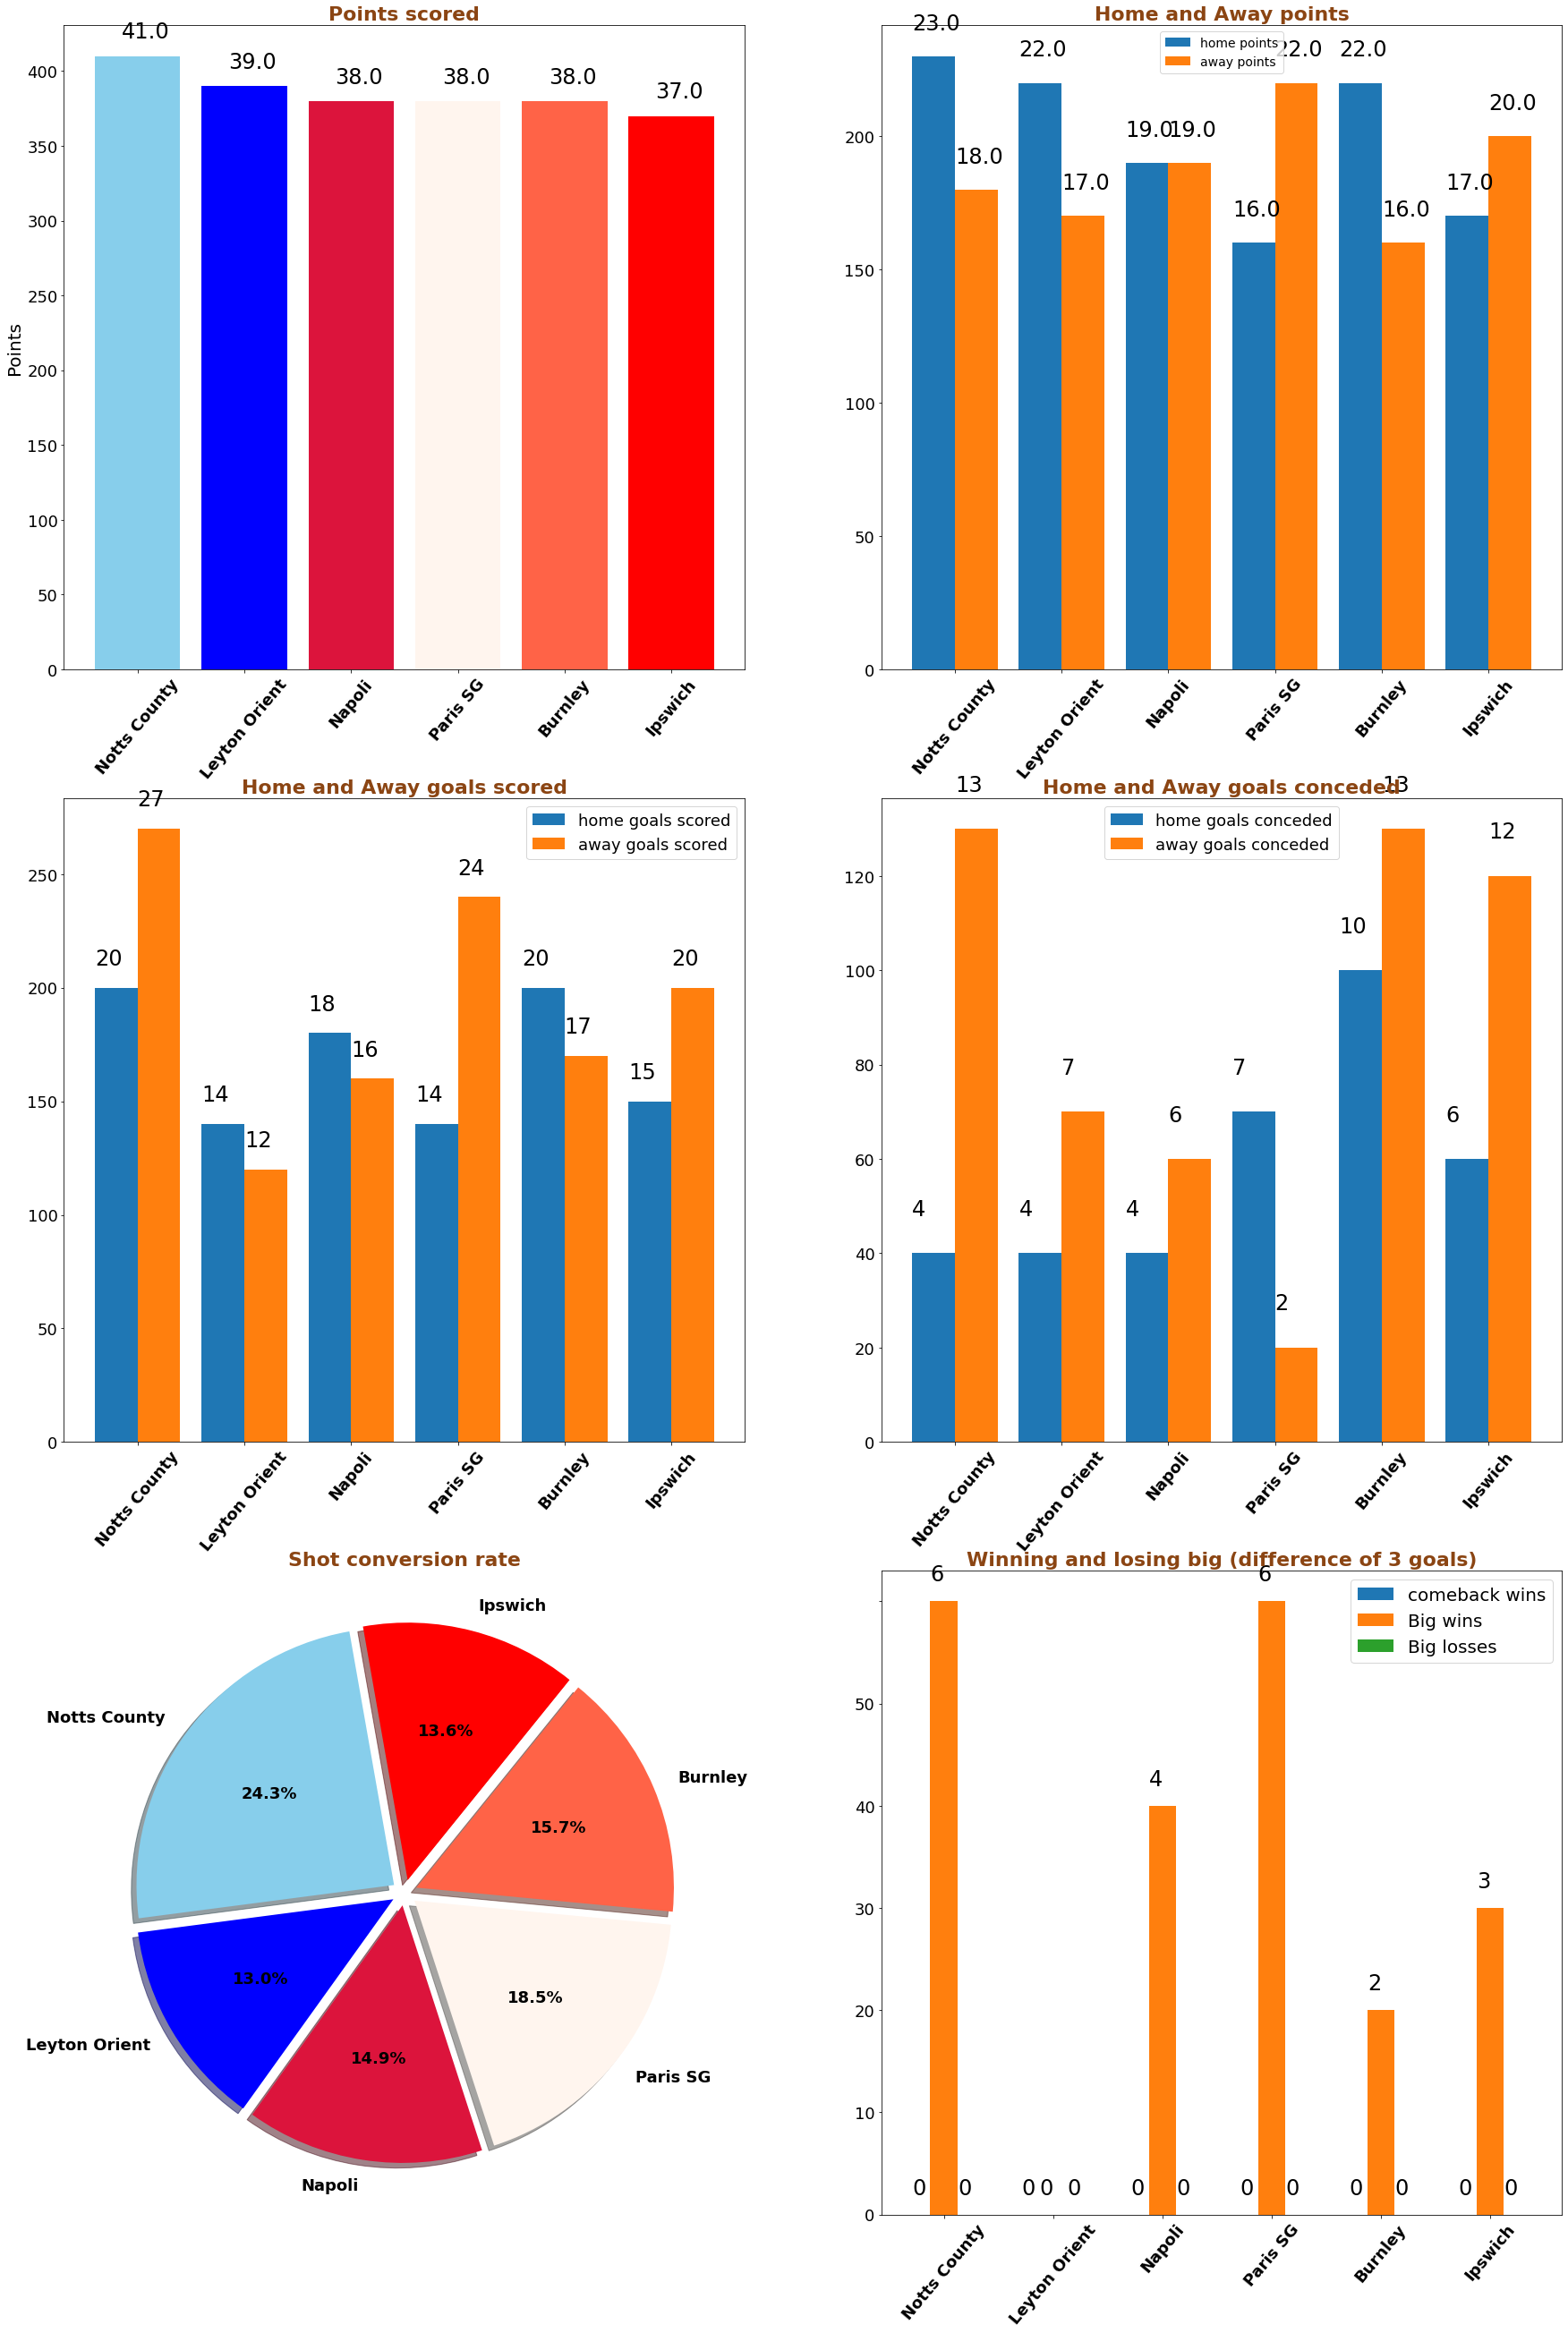

In [ ]:
Big_6_epl = points_table_epl[:6]

fig,ax = plt.subplots(3,2,figsize = (30,45))
ax[0,0].bar(Big_6_epl.index,Big_6_epl['Total_points_won'],color = ['skyblue','blue','crimson','seashell','tomato','red'])
ax[0,0].set_ylabel('Points',fontsize = 20)
ax[0,0].set_yticklabels(range(0,500,50),fontsize = 18)
ax[0,0].set_xticklabels(Big_6_epl.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[0,0].set_title('Points scored',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[0,0].patches:
    ax[0,0].text(i.get_x()+0.25,i.get_height()+1.2,str(i.get_height()),fontsize = 24)

    
x = np.arange(len(Big_6_epl.index))
w = 0.40
ax[0,1].bar(x - w/2,Big_6_epl['home_points'],w,label = 'home points')
ax[0,1].bar(x + w/2,Big_6_epl['away_points'],w,label = 'away points')
ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels(Big_6_epl.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[0,1].set_yticklabels(range(0,300,50),fontsize = 18)
ax[0,1].legend(loc = 'upper center',fontsize = 14)
ax[0,1].set_title('Home and Away points',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[0,1].patches:
    ax[0,1].text(i.get_x(),i.get_height()+1,str(i.get_height()),fontsize = 24)


ax[1,0].bar(x-w/2,Big_6_epl['home_goals_scored'],w,label = 'home goals scored')
ax[1,0].bar(x+w/2,Big_6_epl['away_goals_scored'],w,label = 'away goals scored')
ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(Big_6_epl.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[1,0].set_yticklabels(range(0,300,50),fontsize = 18)
ax[1,0].legend(fontsize = 18)
ax[1,0].set_title('Home and Away goals scored',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[1,0].patches:
    ax[1,0].text(i.get_x(),i.get_height()+1,str(i.get_height()),fontsize = 24)

    
ax[1,1].bar(x-w/2,Big_6_epl['home_goals_conceded'],w,label = 'home goals conceded')
ax[1,1].bar(x+w/2,Big_6_epl['away_goals_conceded'],w,label = 'away goals conceded')
ax[1,1].set_xticks(x)
ax[1,1].set_xticklabels(Big_6_epl.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[1,1].set_yticklabels(range(0,180,20),fontsize = 18)
ax[1,1].legend(fontsize = 18)
ax[1,1].set_title('Home and Away goals conceded',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[1,1].patches:
    ax[1,1].text(i.get_x(),i.get_height()+0.8,str(i.get_height()),fontsize = 24)

ax[2,0].pie(100 * Big_6_epl['goals_scored_per_match']/Big_6_epl['shot_taken_per_match'],autopct = '%1.1f%%',startangle = 100,labels = Big_6_epl.index,shadow = True,explode = (0.05,0.05,0.05,0.05,0.05,0.05),colors = ('skyblue','blue','crimson','seashell','tomato','red'),textprops = {'fontsize':18, 'fontweight':'bold'})
ax[2,0].set_title('Shot conversion rate',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')

w = 0.25
ax[2,1].bar(x-2*w/3,Big_6_epl['comeback_wins'],w,label = 'comeback wins')
ax[2,1].bar(x,Big_6_epl['Big_wins'],w,label = 'Big wins')
ax[2,1].bar(x+w,Big_6_epl['Big_loss'],w,label = 'Big losses')
ax[2,1].set_xticks(x)
ax[2,1].set_xticklabels(Big_6_epl.index,fontsize = 18,fontweight = 'bold',rotation = 50)
ax[2,1].set_yticklabels(range(0,60,10),fontsize = 18)
ax[2,1].legend(fontsize = 20)
ax[2,1].set_title('Winning and losing big (difference of 3 goals)',fontsize = 22,fontweight = 'bold',color = 'saddlebrown')
for i in ax[2,1].patches:
    ax[2,1].text(i.get_x(),i.get_height()+0.2,str(i.get_height()),fontsize = 24)

plt.show()

In [ ]:
points_table_epl.columns

Index(['Total games', 'home_wins', 'home_loss', 'away_wins', 'away_loss',
       'Draws', 'home_goals_scored', 'away_goals_scored',
       'home_goals_conceded', 'away_goals_conceded', 'clean sheets',
       'goal_difference', 'goals_scored_per_match', 'goals_conceded_per_match',
       'shot_taken_per_match', 'shot_on_target_per_match', 'fouls_per_match',
       'yellow_cards_per_match', 'red_cards_per_match', 'corners_per_match',
       'Total_wins', 'home_points', 'away_points', 'comeback_wins', 'Big_wins',
       'Big_loss', 'Total_points_won', 'points_per_match', 'team id'],
      dtype='object')

In [ ]:
points_table_epl

,Total games,home_wins,home_loss,away_wins,away_loss,Draws,home_goals_scored,away_goals_scored,home_goals_conceded,away_goals_conceded,...,corners_per_match,Total_wins,home_points,away_points,comeback_wins,Big_wins,Big_loss,Total_points_won,points_per_match,team id
Notts County,18,7.0,NaN,5.0,1.0,5.0,20,27,4,13,...,4.93,12.0,23.0,18.0,0,6,0,41.0,2.28,0
Leyton Orient,17,7.0,1.0,5.0,1.0,3.0,14,12,4,7,...,4.94,12.0,22.0,17.0,0,0,0,39.0,2.29,1
Napoli,14,6.0,NaN,6.0,NaN,2.0,18,16,4,6,...,5.93,12.0,19.0,19.0,0,4,0,38.0,2.71,2
Paris SG,14,5.0,NaN,7.0,NaN,2.0,14,24,7,2,...,6.36,12.0,16.0,22.0,0,6,0,38.0,2.71,3
Burnley,20,6.0,NaN,4.0,2.0,8.0,20,17,10,13,...,6.00,10.0,22.0,16.0,0,2,0,38.0,1.90,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Verona,14,1.0,6.0,NaN,5.0,NaN,7,4,15,12,...,5.50,NaN,NaN,NaN,0,0,0,NaN,NaN,380
Volendam,13,1.0,5.0,NaN,4.0,NaN,7,6,16,19,...,5.69,NaN,NaN,NaN,0,0,3,NaN,NaN,381
Wolves,14,2.0,3.0,NaN,5.0,4.0,5,3,11,11,...,4.86,NaN,8.0,NaN,0,0,3,NaN,NaN,382
Wrexham,18,9.0,NaN,4.0,2.0,NaN,35,15,9,9,...,4.93,13.0,NaN,15.0,3,5,0,NaN,NaN,383


In [ ]:
df_epl

,Date,hometeam,awayteam,fulltime_home_goals,fulltime_away_goals,fulltime_results,halftime_home_goals,halftime_away_goals,halftime_results,referee,...,away_shot_ontarget,home_fouls,away_fouls,home_corner,away_corner,home_yellow,away_yellow,home_red,away_red,season
0,2022-07-15,Kaiserslautern,Hannover,2,1,H,1,0,H,NaN,...,5.0,15.0,16.0,4.0,3.0,6,3,0,0,1
1,2022-07-16,Regensburg,Darmstadt,2,0,H,1,0,H,NaN,...,2.0,17.0,12.0,3.0,5.0,3,4,0,1,1
2,2022-07-16,Sandhausen,Bielefeld,2,1,H,1,0,H,NaN,...,6.0,21.0,15.0,5.0,6.0,7,3,0,1,1
3,2022-07-16,St Pauli,Nurnberg,3,2,H,3,0,H,NaN,...,4.0,17.0,10.0,4.0,4.0,3,4,0,0,1
4,2022-07-16,Greuther Furth,Holstein Kiel,2,2,D,0,1,A,NaN,...,2.0,14.0,9.0,12.0,1.0,5,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,2022-11-10,Verona,Juventus,0,1,A,0,0,D,NaN,...,3.0,14.0,13.0,5.0,4.0,3,2,0,1,8
2815,2022-11-10,Lazio,Monza,1,0,H,0,0,D,NaN,...,0.0,15.0,14.0,4.0,3.0,2,1,0,0,8
2816,2022-11-10,Valencia,Betis,3,0,H,0,0,D,NaN,...,1.0,12.0,9.0,5.0,5.0,1,3,0,1,8
2817,2022-11-10,Feyenoord,Cambuur,1,0,H,1,0,H,NaN,...,4.0,9.0,9.0,8.0,4.0,3,1,0,0,8


### Creating seperate datafram for learning algorithms

- Now after the analysis and visualization part we have to move to the prediction part, here we have a data of total 5 seasons so we are going to predict the results of 5th season with help of past 4 seasons and also taking the consideration of the current form for each team

In [ ]:
ml_epl = df_epl[['Date','hometeam','awayteam','fulltime_results','season']]
ml_epl['hscore'] = df_epl['fulltime_home_goals']
ml_epl['ascore'] = df_epl['fulltime_away_goals']
ml_epl

,Date,hometeam,awayteam,fulltime_results,season,hscore,ascore
0,2022-07-15,Kaiserslautern,Hannover,H,1,2,1
1,2022-07-16,Regensburg,Darmstadt,H,1,2,0
2,2022-07-16,Sandhausen,Bielefeld,H,1,2,1
3,2022-07-16,St Pauli,Nurnberg,H,1,3,2
4,2022-07-16,Greuther Furth,Holstein Kiel,D,1,2,2
...,...,...,...,...,...,...,...
2814,2022-11-10,Verona,Juventus,A,8,0,1
2815,2022-11-10,Lazio,Monza,H,8,1,0
2816,2022-11-10,Valencia,Betis,H,8,3,0
2817,2022-11-10,Feyenoord,Cambuur,H,8,1,0


### Assigning required data to the matches which will usefull for the learning algos

- As we have team names in string we are going to give each team a id based on their performance of last seasons, so that take the past influence of the teams. We are also going to create a 2 columns which will tell how the teams perform in their home and away matches

In [ ]:
ids = {}
a = 0 
for i in points_table_epl.index:
    ids[i] = a+1
    a += 1
pts_per_home_match = {}
a=0
for i in points_table_epl['team id']:
    pts_per_home_match[i] = (2*points_table_epl['home_points'][a] / (points_table_epl['Total games'][a]))
    a += 1

pts_per_away_match = {}
a=0
for i in points_table_epl['team id']:
    pts_per_away_match[i] = (2*points_table_epl['away_points'][a] / (points_table_epl['Total games'][a]))
    a += 1
pts_per_away_match

{0: 2.0,
 1: 2.0,
 2: 2.7142857142857144,
 3: 3.142857142857143,
 4: 1.6,
 5: 2.3529411764705883,
 6: 1.7,
 7: 2.125,
 8: 1.8823529411764706,
 9: 1.5555555555555556,
 10: 1.3,
 11: 1.4,
 12: 1.4285714285714286,
 13: 1.7647058823529411,
 14: 2.2857142857142856,
 15: 1.8,
 16: 1.4,
 17: 2.0,
 18: 1.8823529411764706,
 19: 2.4615384615384617,
 20: 1.3,
 21: 1.5294117647058822,
 22: 2.0,
 23: 1.625,
 24: 1.5555555555555556,
 25: 1.6,
 26: 1.6666666666666667,
 27: 1.6666666666666667,
 28: 2.0,
 29: 1.7,
 30: 2.0,
 31: 1.4,
 32: 1.5714285714285714,
 33: 1.5294117647058822,
 34: 0.5555555555555556,
 35: 2.1176470588235294,
 36: 0.631578947368421,
 37: 1.5714285714285714,
 38: 1.5714285714285714,
 39: 2.0,
 40: 1.7142857142857142,
 41: 1.8823529411764706,
 42: 1.6,
 43: 2.2857142857142856,
 44: 1.3333333333333333,
 45: 2.0,
 46: 1.4285714285714286,
 47: 1.7333333333333334,
 48: 1.2222222222222223,
 49: 2.2857142857142856,
 50: 2.0,
 51: 1.0,
 52: 1.25,
 53: 0.7,
 54: 1.4444444444444444,
 55: 1.

In [ ]:
ml_epl = ml_epl.replace({'hometeam' : ids})
ml_epl = ml_epl.replace({'awayteam' : ids})
ml_epl.rename(columns = {'hometeam':'hometeam_id','awayteam':'awayteam_id'},inplace = True)
ml_epl['HTeam_pt_per_home_match'] = ml_epl['hometeam_id']

In [ ]:
ml_epl = ml_epl.replace({'HTeam_pt_per_home_match' : pts_per_home_match})

In [ ]:
ml_epl['ATeam_pt_per_away_match'] = ml_epl['awayteam_id']
ml_epl = ml_epl.replace({'ATeam_pt_per_away_match' : pts_per_away_match})

In [ ]:
ml_epl.tail(40)
vc = ml_epl[ml_epl.hometeam_id==602]
vc

,Date,hometeam_id,awayteam_id,fulltime_results,season,hscore,ascore,HTeam_pt_per_home_match,ATeam_pt_per_away_match




- As we know in football the recent form matters way more than their reputations, so we are going to include a number of columns which will show their recent form.
- This include their previous head to head results, their previous 5 matches results, their scoring form and also their conceding form which will us about both their defence and attacking abilities, as we know keeping clean sheets is a very important factor in winning matches so we will get the number of clean sheets in their recent matches 



In [ ]:
def previous_5_matches(ml_epl,date,team_id):
    matches = ml_epl[(ml_epl['hometeam_id'] == team_id) | (ml_epl['awayteam_id'] == team_id)]
    last_matches = matches[matches.Date < date].sort_values(by = 'Date', ascending = False).iloc[:5,:]
    x = 0
    for i in range(5):
        if len(last_matches) <= i:
            break
        if ((last_matches['hometeam_id'].iloc[i] == team_id) and (last_matches['fulltime_results'].iloc[i] == 'H')):
            x += 3
        elif ((last_matches['awayteam_id'].iloc[i] == team_id) and (last_matches['fulltime_results'].iloc[i] == 'A')):
            x+=3
        elif (last_matches['fulltime_results'].iloc[i] == 'D'):
            x += 1
    return x

In [ ]:
def htoh_results(ml_epl,date,h_team,a_team):
    matches = ml_epl[((ml_epl['hometeam_id'] == h_team) | (ml_epl['awayteam_id'] == h_team)) & ((ml_epl['hometeam_id'] == a_team) | (ml_epl['awayteam_id'] == a_team))]
    last_matches = matches[matches.Date < date].sort_values(by = 'Date', ascending = False).iloc[:,:]
    s = 0
    r = 0
    for i in range(3):
        if len(last_matches) <= i:
            break
        if ((last_matches['hometeam_id'].iloc[i] == h_team) and (last_matches['fulltime_results'].iloc[i] == 'H')):
            s += 3
        elif ((last_matches['awayteam_id'].iloc[i] == h_team) and (last_matches['fulltime_results'].iloc[i] == 'A')):
            s += 3
        elif (last_matches['fulltime_results'].iloc[i] == 'D'):
            s += 1 
            r += 1
        else :
            r += 3
    return s,r

In [ ]:
def recent_scoring_form(ml_epl,date,h_team):
    matches = ml_epl[((ml_epl['hometeam_id'] == h_team) | (ml_epl['awayteam_id'] == h_team))]
    last_matches = matches[matches.Date < date].sort_values(by = 'Date', ascending = False).iloc[:5,:]
    s = 0
    r = 0
    for i in range(5):
        if len(last_matches) <= i:
            break
        if last_matches['hometeam_id'].iloc[i] == h_team:
            s += last_matches['hscore'].iloc[i]
            r += last_matches['ascore'].iloc[i]
        if last_matches['awayteam_id'].iloc[i] == h_team:
            s += last_matches['ascore'].iloc[i]
            r += last_matches['hscore'].iloc[i]
    return s,r

In [ ]:
def recent_cs(ml_epl,date,h_team):
    matches = ml_epl[((ml_epl['hometeam_id'] == h_team) | (ml_epl['awayteam_id'] == h_team))]
    last_matches = matches[matches.Date < date].sort_values(by = 'Date', ascending = False).iloc[:5,:]
    s = 0
    for i in range(5):
        if len(last_matches) <= i:
            break
        if last_matches['hometeam_id'].iloc[i] == h_team and last_matches['ascore'].iloc[i] == 0:
            s += 1
        if last_matches['awayteam_id'].iloc[i] == h_team and last_matches['hscore'].iloc[i] == 0:
            s += 1
    return s

In [ ]:
h = []
a = []
h_t = []
a_t = []
h_prev_for = []
h_prev_against = []
a_prev_for = []
a_prev_against = []
h_cs = []
a_cs = []
for i in range(len(ml_epl)):
    x = previous_5_matches(ml_epl,ml_epl['Date'][i],ml_epl['hometeam_id'][i])
    y = previous_5_matches(ml_epl,ml_epl['Date'][i],ml_epl['awayteam_id'][i])
    s,r = htoh_results(ml_epl,ml_epl['Date'][i],ml_epl['hometeam_id'][i],ml_epl['awayteam_id'][i])
    x1,y1 =  recent_scoring_form(ml_epl,ml_epl['Date'][i],ml_epl['hometeam_id'][i])
    s1,r1 =  recent_scoring_form(ml_epl,ml_epl['Date'][i],ml_epl['awayteam_id'][i])
    cs1 = recent_cs(ml_epl,ml_epl['Date'][i],ml_epl['hometeam_id'][i])
    cs2 = recent_cs(ml_epl,ml_epl['Date'][i],ml_epl['awayteam_id'][i])
    h.append(x)
    a.append(y)
    h_t.append(s)
    a_t.append(r)
    h_prev_for.append(x1)
    h_prev_against.append(y1)
    a_prev_for.append(s1)
    a_prev_against.append(r1)
    h_cs.append(cs1)
    a_cs.append(cs2)

In [ ]:
ml_epl['home_team_form'] = h
ml_epl['away_team_form'] = a
ml_epl['hometeam_headtohead'] = h_t
ml_epl['awayteam_headtohead'] = a_t
ml_epl['hometeam_recent_scoring_form'] = h_prev_for
ml_epl['hometeam_recent_conceding_form'] = h_prev_against
ml_epl['awayteam_recent_scoring_form'] = a_prev_for
ml_epl['awayteam_recent_conceding_form'] = a_prev_against
ml_epl['hometeam_recent_cs'] = h_cs
ml_epl['awayteam_recent_cs'] = a_cs
ml_epl = df_epl = func(ml_epl)


In [ ]:
len(df_epl)

2819

### Checking the correlation between the features

- We are going to check if the features are too much correlated or not, as features with too much correlation will not help the model that much but will increases the time taken

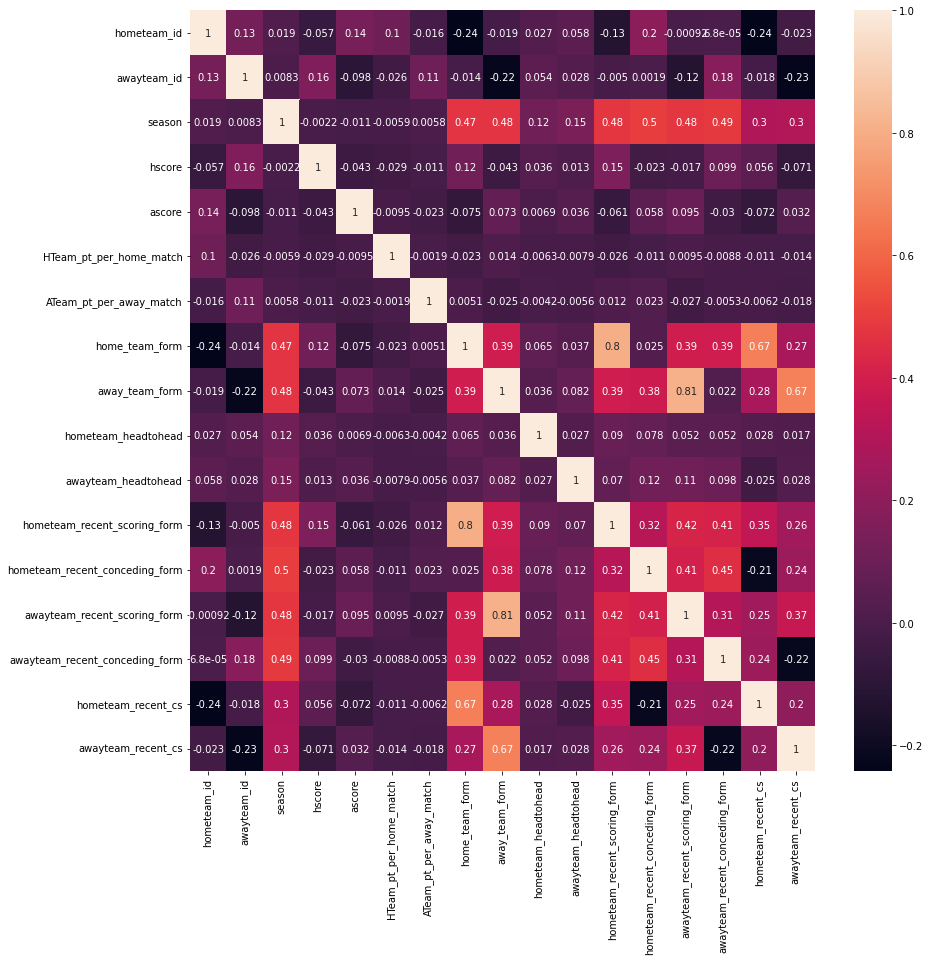

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(ml_epl.corr(),annot = True)
plt.show()

### Applying different models to the data and checking the confusion matrix

- We are going to run different models with different parameters available and check which model gives the best accuracy. We are also going to check the confusion matrix which will tell which results are tuff to predict

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn import metrics

# Preparing X,X_test,Y,Y_test
X = ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][:1520]
y = ml_epl['fulltime_results'][:1520]

X_test = ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][1520:]
y_test = ml_epl['fulltime_results'][1520:]


# Logistic Regression Model "clf1"

In [ ]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state = 0,C= 0.9,solver = 'saga',multi_class = 'multinomial',class_weight = {'H': 0.9,'D' : 1,'A' : 1.1})
clf1.fit(X,y)
print('accuracy of simple logistic regression model is: ',clf1.score(X_test,y_test)*100,'%')

accuracy of simple logistic regression model is:  48.65280985373364 %


### Logistic Regression perfomance

In [ ]:
clf1.predict_proba(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][:1520])


array([[0.3383363 , 0.31872639, 0.34293731],
       [0.58363533, 0.21978534, 0.19657933],
       [0.27983798, 0.27871502, 0.441447  ],
       ...,
       [0.41793728, 0.23883361, 0.34322911],
       [0.16511683, 0.24774111, 0.58714206],
       [0.17949735, 0.21204427, 0.60845837]])

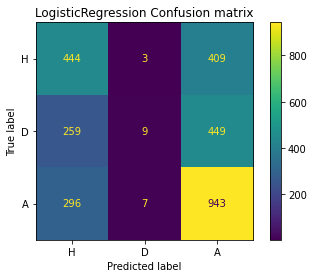

In [ ]:
confusion_matrix = metrics.confusion_matrix(ml_epl['fulltime_results'][:],clf1.predict(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][:]))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["H", "D","A"])
cm_display.plot()
plt.title("LogisticRegression Confusion matrix")
plt.show()

In [ ]:
predicted1 = clf1.predict(X_test)
report1 = classification_report(y_test,predicted1)
print(report1)

              precision    recall  f1-score   support

           A       0.44      0.51      0.48       401
           D       0.38      0.01      0.02       335
           H       0.51      0.75      0.61       563

    accuracy                           0.49      1299
   macro avg       0.44      0.42      0.37      1299
weighted avg       0.46      0.49      0.42      1299



# Support Vector classification "clf2"

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
clf2 = SVC(kernel = 'linear',C = 0.9,decision_function_shape = 'ovr',break_ties = True,random_state = 0,class_weight = {'H': 0.9,'D' : 1,'A' : 1.1})
clf2.fit(X,y)
print('accuracy of SVC model is: ',clf2.score(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][1520:],ml_epl['fulltime_results'][1520:])*100,'%')

accuracy of SVC model is:  48.80677444187837 %


### SVC perfomance

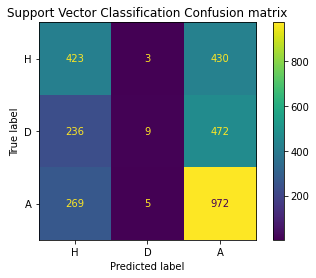

In [ ]:
confusion_matrix = metrics.confusion_matrix(ml_epl['fulltime_results'][:],clf2.predict(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][:]))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["H", "D","A"])
cm_display.plot()
plt.title("Support Vector Classification Confusion matrix")
plt.show()

In [ ]:
predicted2 = clf2.predict(X_test)
report2 = classification_report(y_test,predicted2)
print(report2)

              precision    recall  f1-score   support

           A       0.44      0.51      0.47       401
           D       0.43      0.01      0.02       335
           H       0.51      0.76      0.61       563

    accuracy                           0.49      1299
   macro avg       0.46      0.43      0.37      1299
weighted avg       0.47      0.49      0.42      1299



## K-Nearest Neihbours Classifier "clf3"

In [ ]:
from sklearn import neighbors 
clf3 = neighbors.KNeighborsClassifier(95)
clf3.fit(X,y)
clf3.score(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][1520:],ml_epl['fulltime_results'][1520:])*100

48.26789838337183

### K-Nearest Neihbours Classifier perfomance

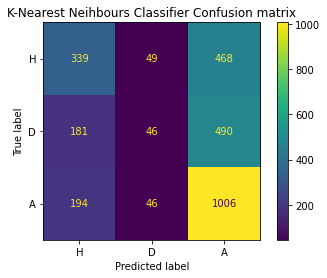

In [ ]:
confusion_matrix = metrics.confusion_matrix(ml_epl['fulltime_results'][:],clf3.predict(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][:]))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["H", "D","A"])
cm_display.plot()
plt.title("K-Nearest Neihbours Classifier Confusion matrix")
plt.show()

# Decision Tree Classifier "clf4"

In [ ]:
from sklearn import tree
clf4 = tree.DecisionTreeClassifier(max_depth =2)
clf4.fit(X,y)
clf4.score(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][1520:],ml_epl['fulltime_results'][1520:])*100

47.42109314857583

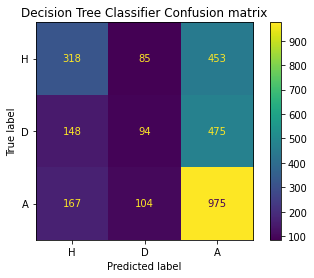

In [ ]:
confusion_matrix = metrics.confusion_matrix(ml_epl['fulltime_results'][:],clf4.predict(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][:]))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["H", "D","A"])
cm_display.plot()
plt.title("Decision Tree Classifier Confusion matrix")
plt.show()

# MLP Classifier "clf5"

In [ ]:
from sklearn.neural_network import MLPClassifier
clf5 = MLPClassifier(hidden_layer_sizes = (1000,),activation = 'identity',solver = 'lbfgs',random_state = 1)
clf5.fit(X,y)
print(clf5.score(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][:],ml_epl['fulltime_results'][:])*100)

49.27279177013125


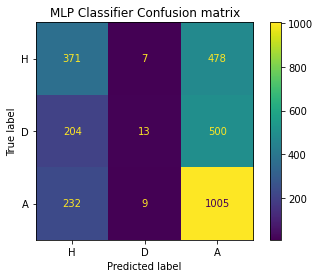

In [ ]:
confusion_matrix=metrics.confusion_matrix(ml_epl['fulltime_results'][:],clf5.predict(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][:]))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["H", "D","A"])
cm_display.plot()
plt.title("MLP Classifier Confusion matrix")
plt.show()

In [ ]:
clf6 = MLPClassifier(hidden_layer_sizes = (6000,),activation = 'identity',solver = 'adam',random_state = 1,learning_rate_init = 0.001)
clf6.fit(X,y)
print(clf6.score(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][1520:],ml_epl['fulltime_results'][1520:])*100)

36.41262509622787


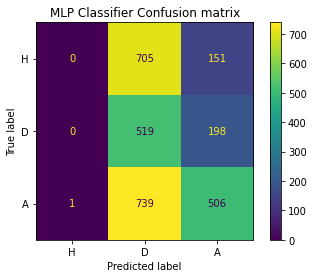

In [ ]:
confusion_matrix=metrics.confusion_matrix(ml_epl['fulltime_results'][:],clf6.predict(ml_epl[['hometeam_id','awayteam_id','HTeam_pt_per_home_match','ATeam_pt_per_away_match','home_team_form','away_team_form','hometeam_headtohead','awayteam_headtohead','hometeam_recent_scoring_form','hometeam_recent_conceding_form','awayteam_recent_scoring_form','awayteam_recent_conceding_form','hometeam_recent_cs','awayteam_recent_cs']][:]))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["H", "D","A"])
cm_display.plot()
plt.title("MLP Classifier Confusion matrix")
plt.show()

In [ ]:
predicted3 = clf6.predict(X_test)
report3 = classification_report(y_test,predicted3)
print(report3)

              precision    recall  f1-score   support

           A       0.00      0.00      0.00       401
           D       0.27      0.73      0.40       335
           H       0.59      0.40      0.48       563

    accuracy                           0.36      1299
   macro avg       0.29      0.38      0.29      1299
weighted avg       0.32      0.36      0.31      1299



# Artifical Neural Network "clf7"

In [ ]:
# Converting to  array
X_NP_ARRAY = np.array(X)
Y_NP_ARRAY = np.array(y)

X_TEST_NP_ARRAY = np.array(X_test)
Y_TEST_NP_ARRAY = np.array(y_test)

# one hot encoding Y
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
Y_NP_ARRAY = Y_NP_ARRAY.reshape(-1, 1)
Y_TEST_NP_ARRAY = Y_TEST_NP_ARRAY.reshape(-1,1)
enc.fit(Y_NP_ARRAY)
Y_NP_ARRAY = enc.transform(Y_NP_ARRAY).toarray()
Y_TEST_NP_ARRAY = enc.transform(Y_TEST_NP_ARRAY).toarray()
print("Training Dataset X Size ",X_NP_ARRAY.shape)
print("Training Dataset Y Size ",Y_NP_ARRAY.shape)
print("Training Dataset X_TEST Size ",X_TEST_NP_ARRAY.shape)
print("Training Dataset Y_TEST Size ",Y_TEST_NP_ARRAY.shape)


Training Dataset X Size  (1520, 14)
Training Dataset Y Size  (1520, 3)
Training Dataset X_TEST Size  (1299, 14)
Training Dataset Y_TEST Size  (1299, 3)


In [ ]:
import tensorflow as tf

network =  tf.keras.Sequential()
network.add(tf.keras.layers.Dense(units=14, activation='relu', input_shape=(14,)))
network.add(tf.keras.layers.Dense(units=126, activation='relu'))
network.add(tf.keras.layers.Dense(units=512, activation='relu'))
network.add(tf.keras.layers.Dense(units=64, activation='sigmoid'))
network.add(tf.keras.layers.Dense(units=3, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
network.fit(X_NP_ARRAY,Y_NP_ARRAY,epochs=100, batch_size=100)
network.evaluate(X_TEST_NP_ARRAY,Y_TEST_NP_ARRAY)

Epoch 1/100
16/16 [==============================] - 1s 6ms/step - loss: 1.0638 - accuracy: 0.4434
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 1.0261 - accuracy: 0.4928
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 1.0232 - accuracy: 0.4928
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 1.0320 - accuracy: 0.4908
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 1.0222 - accuracy: 0.4928
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 1.0274 - accuracy: 0.4934
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 1.0156 - accuracy: 0.4954
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 1.0217 - accuracy: 0.4928
Epoch 9/100
16/16 [==============================] - 0s 7ms/step - loss: 1.0203 - accuracy: 0.4901
Epoch 10/100
16/16 [==============================] - 0s 6ms/step - loss: 1.0174 - accuracy: 0.4974
Epoch 11/

[1.1198756694793701, 0.4795996844768524]

In [ ]:
# Test dataset Predictions
Y_TEST_PREDS = network.predict(X_TEST_NP_ARRAY)
Y_TEST_PREDS_ONE_HOT = np.array(tf.one_hot(tf.argmax(Y_TEST_PREDS, axis = 1), depth = 3))

# Train dataset Prediction
Y_TRAIN_PREDS = network.predict(X_NP_ARRAY)
Y_TRAIN_PREDS_ONE_HOT = np.array(tf.one_hot(tf.argmax(Y_TRAIN_PREDS, axis = 1), depth = 3))



48/48 [==============================] - 0s 3ms/step


# ANN Train confustion matrix

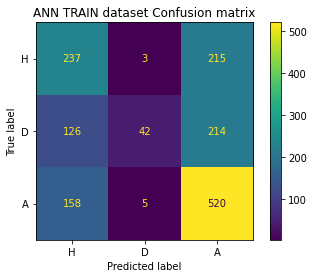

In [ ]:
confusion_matrix=metrics.confusion_matrix(Y_NP_ARRAY.argmax(axis=1),Y_TRAIN_PREDS_ONE_HOT.argmax(axis=1))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["H", "D","A"])
cm_display.plot()
plt.title("ANN TRAIN dataset Confusion matrix")
plt.show()

In [ ]:
report1 = classification_report(Y_TEST_NP_ARRAY,Y_TEST_PREDS_ONE_HOT)
print(report1)

              precision    recall  f1-score   support

           0       0.44      0.53      0.48       401
           1       0.26      0.03      0.05       335
           2       0.51      0.71      0.60       563

   micro avg       0.48      0.48      0.48      1299
   macro avg       0.41      0.42      0.38      1299
weighted avg       0.43      0.48      0.42      1299
 samples avg       0.48      0.48      0.48      1299



**LSTM model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(1520, 3)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(32, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(32))(x)
# Add a classifier
x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.fit(X_NP_ARRAY,Y_NP_ARRAY,epochs=100, batch_size=128)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 3)           4560      
                                                                 
 bidirectional (Bidirectiona  (None, None, 64)         9216      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 3)                 99    

LSTM Model confustion matrix

In [ ]:
# Test dataset Predictions
Y_TEST_LSTM_PREDS = model.predict(X_TEST_NP_ARRAY)
Y_TEST_LSTM_PREDS_ONE_HOT = np.array(tf.one_hot(tf.argmax(Y_TEST_LSTM_PREDS, axis = 1), depth = 3))

# Train dataset Prediction
Y_TRAIN_LSTM_PREDS = model.predict(X_NP_ARRAY)
Y_TRAIN_LSTM_PREDS_ONE_HOT = np.array(tf.one_hot(tf.argmax(Y_TRAIN_LSTM_PREDS, axis = 1), depth = 3))

48/48 [==============================] - 0s 7ms/step


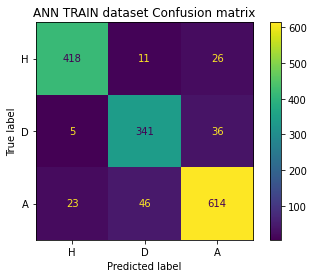

In [ ]:
confusion_matrix=metrics.confusion_matrix(Y_NP_ARRAY.argmax(axis=1),Y_TRAIN_LSTM_PREDS_ONE_HOT.argmax(axis=1))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["H", "D","A"])
cm_display.plot()
plt.title("ANN TRAIN dataset Confusion matrix")
plt.show()

In [ ]:
model.evaluate(X_TEST_NP_ARRAY,Y_TEST_NP_ARRAY)
report1 = classification_report(Y_TEST_NP_ARRAY,Y_TEST_LSTM_PREDS_ONE_HOT)
print(report1)

41/41 [==============================] - 2s 8ms/step - loss: 3.4891 - accuracy: 0.3695
              precision    recall  f1-score   support

           0       0.32      0.28      0.30       401
           1       0.27      0.24      0.26       335
           2       0.44      0.51      0.47       563

   micro avg       0.37      0.37      0.37      1299
   macro avg       0.34      0.34      0.34      1299
weighted avg       0.36      0.37      0.36      1299
 samples avg       0.37      0.37      0.37      1299



**Live Predictions**

In [ ]:
fixtures = pd.read_csv('https://www.football-data.co.uk/fixtures.csv')

fixtures = fixtures[['Date', 'Div', 'HomeTeam', 'AwayTeam']]
fixtures['Outcome']='?'
fixtures[['prob_H', 'prob_D', 'prob_A']]='?'

fixtures

,Date,Div,HomeTeam,AwayTeam,Outcome,prob_H,prob_D,prob_A
0,11/11/2022,B1,Oud-Heverlee Leuven,Seraing,?,?,?,?
1,12/11/2022,B1,Westerlo,Oostende,?,?,?,?
2,12/11/2022,B1,St Truiden,Cercle Brugge,?,?,?,?
3,12/11/2022,B1,Waregem,Eupen,?,?,?,?
4,12/11/2022,B1,Charleroi,Mechelen,?,?,?,?
...,...,...,...,...,...,...,...,...
175,12/11/2022,T1,Buyuksehyr,Galatasaray,?,?,?,?
176,13/11/2022,T1,Karagumruk,Gaziantep,?,?,?,?
177,13/11/2022,T1,Istanbulspor,Hatayspor,?,?,?,?
178,13/11/2022,T1,Kayserispor,Konyaspor,?,?,?,?


# Conclusion :
We can see after running all the models that logistic regression give the best results of 62.105% accuracy, which is a quite descent result for football prection models, but we have faced problems in predicting the draws which constitute of mor than 23% of the results.We have tried to tackle this problem by changing the class weights but as home wins and away wins have more percentage of results, the total accuracy decreases. We can get a result of 62.8% in SVC model but the problem there is it does not predict a single draw which is not that good. Even adam solver of MLPClassifier gives good results but I am not able to make it predict the draws. Overall we have 3 good models logistic regression, SVC and MLPClassifier with solver adam  which gives 60% or more which is quite good for football prediction in league matches, but the logistic regression model gives the best generalized results.  